In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score

In [2]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

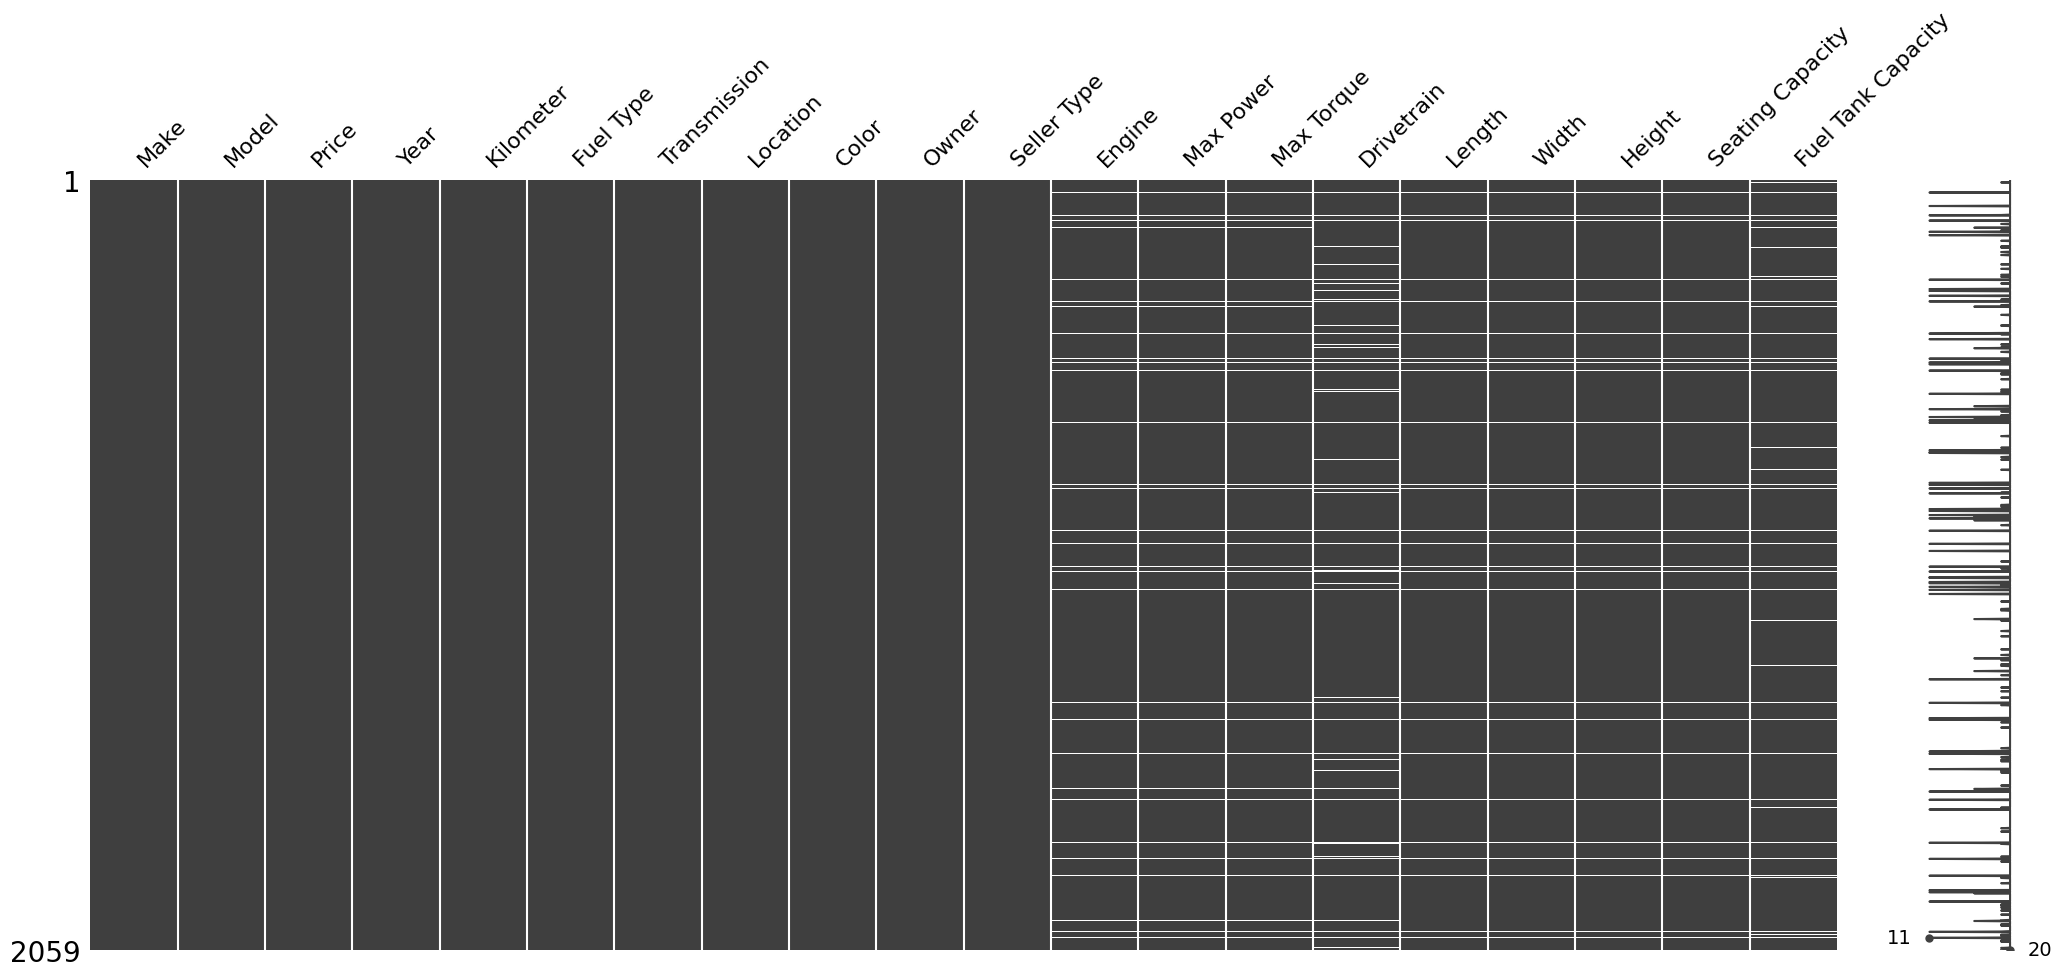

In [3]:
msno.matrix(full_df)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 845 to 1095
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1589 non-null   object 
 12  Max Power           1589 non-null   object 
 13  Max Torque          1589 non-null   object 
 14  Drivetrain          1542 non-null   object 
 15  Length              1598 non-null   float64
 16  Width    

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1613 to 415
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              390 non-null    object 
 12  Max Power           390 non-null    object 
 13  Max Torque          390 non-null    object 
 14  Drivetrain          381 non-null    object 
 15  Length              397 non-null    float64
 16  Width     

In [8]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
845,Honda,Jazz V Petrol,565000,2017,45000,Petrol,Manual,Delhi,Grey,First,Individual,1199 cc,89 bhp @ 6000 rpm,110 Nm @ 4800 rpm,FWD,3955.0,1694.0,1544.0,5.0,40.0
370,Audi,Q3 35 TDI Premium + Sunroof,2375000,2017,61643,Diesel,Automatic,Dehradun,Blue,First,Individual,1968 cc,174 bhp @ 4200 rpm,380 Nm @ 1750 rpm,AWD,4385.0,1831.0,1608.0,5.0,64.0
1741,Mercedes-Benz,CLA 200 Petrol Sport,1975000,2015,19000,Petrol,Automatic,Pune,White,First,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
861,Audi,A4 Premium Plus 40 TFSI,4200000,2021,12321,Petrol,Automatic,Delhi,Black,UnRegistered Car,Individual,1984 cc,188 bhp @ 4200 rpm,320 Nm @ 1450 rpm,FWD,4762.0,1847.0,1433.0,5.0,54.0
169,Mercedes-Benz,C-Class C 200 Avantgarde,2225000,2015,31000,Petrol,Automatic,Mumbai,Blue,First,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,RWD,4686.0,1810.0,1442.0,5.0,66.0


In [9]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1613,Maruti Suzuki,Ciaz Delta Hybrid 1.5 AT [2018-2020],850000,2019,32000,Petrol,Automatic,Pune,Grey,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
711,Audi,A3 35 TDI Premium Plus,2590000,2020,36978,Diesel,Automatic,Chandigarh,Blue,Second,Individual,1968 cc,141 bhp @ 3500 rpm,320 Nm @ 1750 rpm,FWD,4456.0,1796.0,1416.0,5.0,50.0
1437,Hyundai,i10 Asta 1.2 AT Kappa2 with Sunroof,380000,2013,57000,Petrol,Automatic,Kanpur,White,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
516,Maruti Suzuki,Wagon R LXi CNG,280000,2011,54000,CNG,Manual,Mumbai,Silver,First,Individual,998 cc,59@6200,77@3500,NaN,3539.0,1475.0,1700.0,5.0,35.0
478,Audi,A6 2.0 TDI Premium,1175000,2012,77000,Diesel,Automatic,Mumbai,Blue,Second,Individual,1968 cc,177 bhp @ 3750 rpm,380 Nm @ 1750 rpm,FWD,4915.0,1874.0,1455.0,5.0,65.0


In [10]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)


In [11]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [12]:
train_df = train_df.dropna()
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

<Axes: >

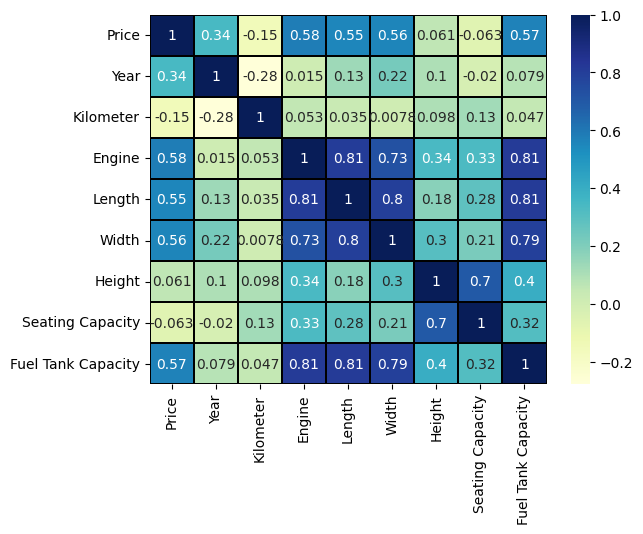

In [13]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Max Power', 'Max Torque'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [14]:
train_df[['bhp', 'rpm power']] = train_df['Max Power'].str.split('@', expand=True)
train_df['bhp'] = train_df['bhp'].str.replace(' bhp', '').str.strip()
train_df['rpm power'] = train_df['rpm power'].str.replace(' rpm', '').str.strip()

In [15]:
train_df[['Nm', 'rpm torque']] = train_df['Max Torque'].str.split('@', expand=True)
train_df['Nm'] = train_df['Nm'].str.replace(' Nm', '').str.strip()
train_df['rpm torque'] = train_df['rpm torque'].str.replace(' rpm', '').str.strip()

In [16]:
train_df['bhp'].replace('', np.nan, inplace=True)
train_df['rpm power'].replace('', np.nan, inplace=True)
train_df['Nm'].replace('', np.nan, inplace=True)
train_df['rpm torque'].replace('', np.nan, inplace=True)

In [17]:
train_df = train_df.drop(['Max Power', 'Max Torque'], axis=1)
train_df.head()

Make                             Model    Price  Year  Kilometer  \
Make                                                                          
Audi 370   Audi       Q3 35 TDI Premium + Sunroof  2375000  2017      61643   
     861   Audi           A4 Premium Plus 40 TFSI  4200000  2021      12321   
     717   Audi       A4 2.0 TDI (177bhp) Premium   975000  2011      75000   
     1605  Audi        Q5 2.0 TDI quattro Premium  2175000  2015     152000   
     1883  Audi  Q3 35 TDI Premium Plus + Sunroof  1450000  2014      71796   

          Fuel Type Transmission   Location   Color             Owner  ...  \
Make                                                                   ...   
Audi 370     Diesel    Automatic   Dehradun    Blue             First  ...   
     861     Petrol    Automatic      Delhi   Black  UnRegistered Car  ...   
     717     Diesel    Automatic    Lucknow  Silver             First  ...   
     1605    Diesel    Automatic      Surat   White             First  ...   
     1883    Diesel    Automatic  Bangalore    Blue             Third  ...   

          Drivetrain  Length   Width  Height  Seating Capacity  \
Make                                                             
Audi 370         AWD  4385.0  1831.0  1608.0               5.0   
     861         FWD  4762.0  1847.0  1433.0               5.0   
     717         FWD  4701.0  1826.0  1427.0               5.0   
     1605        AWD  4629.0  1898.0  1653.0               5.0   
     1883        AWD  4385.0  1831.0  1608.0               5.0   

           Fuel Tank Capacity  bhp  rpm power   Nm rpm torque  
Make                                                           
Audi 370                 64.0  174       4200  380       1750  
     861                 54.0  188       4200  320       1450  
     717                 63.0  177       4200  380       1750  
     1605                75.0  174       4200  380       1750  
     1883                64.0  174       4200  380       1750  

[5 rows x 22 columns]

In [18]:
train_df = train_df.dropna()

<Axes: >

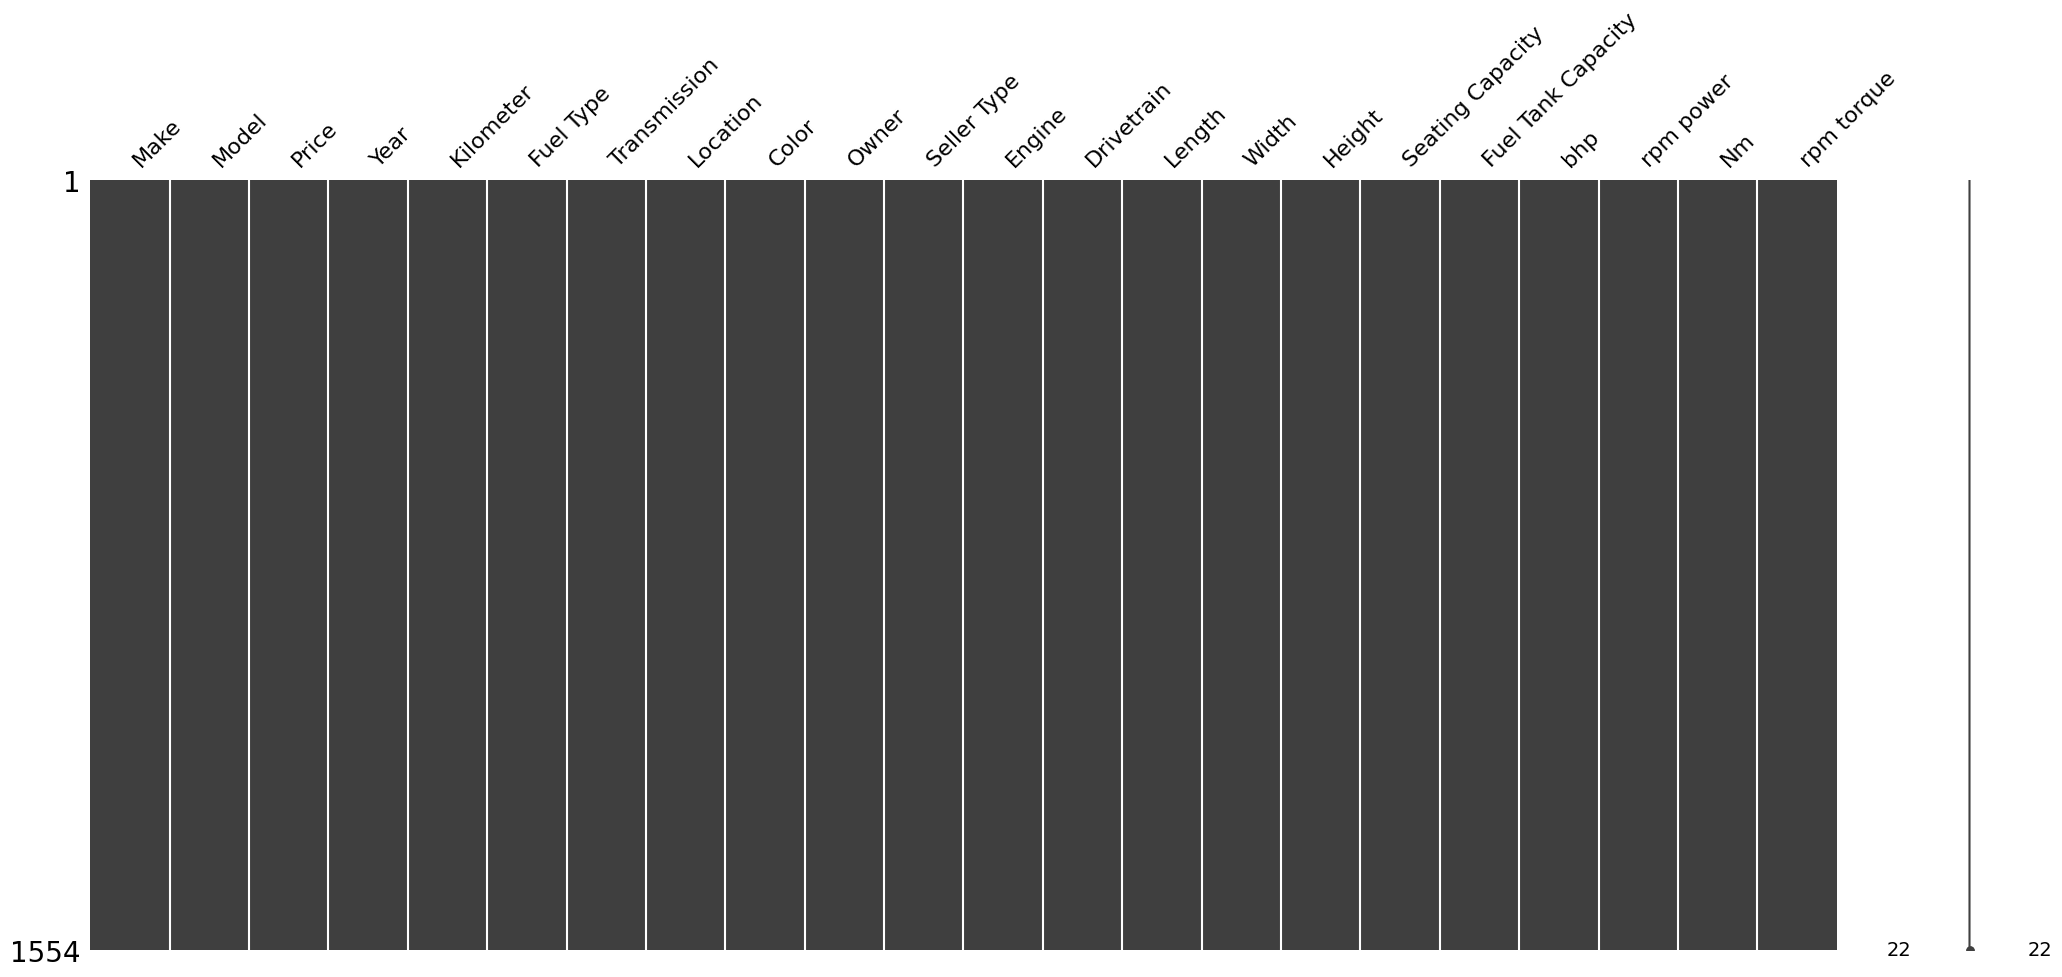

In [19]:
msno.matrix(train_df)

In [20]:
train_df.head()

Make                             Model    Price  Year  Kilometer  \
Make                                                                          
Audi 370   Audi       Q3 35 TDI Premium + Sunroof  2375000  2017      61643   
     861   Audi           A4 Premium Plus 40 TFSI  4200000  2021      12321   
     717   Audi       A4 2.0 TDI (177bhp) Premium   975000  2011      75000   
     1605  Audi        Q5 2.0 TDI quattro Premium  2175000  2015     152000   
     1883  Audi  Q3 35 TDI Premium Plus + Sunroof  1450000  2014      71796   

          Fuel Type Transmission   Location   Color             Owner  ...  \
Make                                                                   ...   
Audi 370     Diesel    Automatic   Dehradun    Blue             First  ...   
     861     Petrol    Automatic      Delhi   Black  UnRegistered Car  ...   
     717     Diesel    Automatic    Lucknow  Silver             First  ...   
     1605    Diesel    Automatic      Surat   White             First  ...   
     1883    Diesel    Automatic  Bangalore    Blue             Third  ...   

          Drivetrain  Length   Width  Height  Seating Capacity  \
Make                                                             
Audi 370         AWD  4385.0  1831.0  1608.0               5.0   
     861         FWD  4762.0  1847.0  1433.0               5.0   
     717         FWD  4701.0  1826.0  1427.0               5.0   
     1605        AWD  4629.0  1898.0  1653.0               5.0   
     1883        AWD  4385.0  1831.0  1608.0               5.0   

           Fuel Tank Capacity  bhp  rpm power   Nm rpm torque  
Make                                                           
Audi 370                 64.0  174       4200  380       1750  
     861                 54.0  188       4200  320       1450  
     717                 63.0  177       4200  380       1750  
     1605                75.0  174       4200  380       1750  
     1883                64.0  174       4200  380       1750  

[5 rows x 22 columns]

In [21]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [22]:
train_df = train_df.dropna()

In [23]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']

scaler = preprocessing.MinMaxScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

<Axes: >

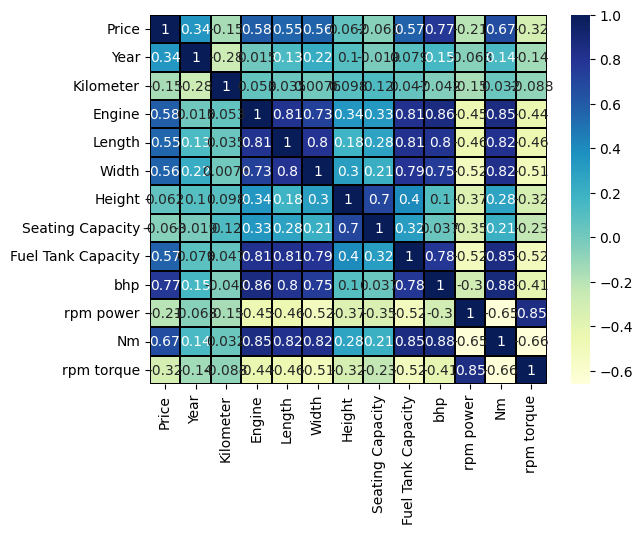

In [24]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [25]:
train_df.head()

Make                             Model     Price  Year  Kilometer  \
Make                                                                           
Audi 370   Audi       Q3 35 TDI Premium + Sunroof  0.066550    11   0.030821   
     861   Audi           A4 Premium Plus 40 TFSI  0.118766    15   0.006160   
     717   Audi       A4 2.0 TDI (177bhp) Premium  0.026494     5   0.037500   
     1605  Audi        Q5 2.0 TDI quattro Premium  0.060828     9   0.076000   
     1883  Audi  Q3 35 TDI Premium Plus + Sunroof  0.040085     8   0.035898   

          Fuel Type Transmission   Location   Color             Owner  ...  \
Make                                                                   ...   
Audi 370     Diesel    Automatic   Dehradun    Blue             First  ...   
     861     Petrol    Automatic      Delhi   Black  UnRegistered Car  ...   
     717     Diesel    Automatic    Lucknow  Silver             First  ...   
     1605    Diesel    Automatic      Surat   White             First  ...   
     1883    Diesel    Automatic  Bangalore    Blue             Third  ...   

          Drivetrain    Length     Width    Height  Seating Capacity  \
Make                                                                   
Audi 370         AWD  0.520648  0.477852  0.505115               0.5   
     861         FWD  0.673279  0.499329  0.281330               0.5   
     717         FWD  0.648583  0.471141  0.273657               0.5   
     1605        AWD  0.619433  0.567785  0.562660               0.5   
     1883        AWD  0.520648  0.477852  0.505115               0.5   

           Fuel Tank Capacity     bhp  rpm power        Nm  rpm torque  
Make                                                                    
Audi 370             0.544444  0.2224   0.241573  0.453552    0.293578  
     861             0.433333  0.2448   0.241573  0.371585    0.238532  
     717             0.533333  0.2272   0.241573  0.453552    0.293578  
     1605            0.666667  0.2224   0.241573  0.453552    0.293578  
     1883            0.544444  0.2224   0.241573  0.453552    0.293578  

[5 rows x 22 columns]

In [26]:
def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
train_df = one_hot_encode(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])

In [27]:
train_df.head()

Model     Price  Year  Kilometer  \
Make                                                                     
Audi 370        Q3 35 TDI Premium + Sunroof  0.066550    11   0.030821   
     861            A4 Premium Plus 40 TFSI  0.118766    15   0.006160   
     717        A4 2.0 TDI (177bhp) Premium  0.026494     5   0.037500   
     1605        Q5 2.0 TDI quattro Premium  0.060828     9   0.076000   
     1883  Q3 35 TDI Premium Plus + Sunroof  0.040085     8   0.035898   

             Engine    Length     Width    Height  Seating Capacity  \
Make                                                                  
Audi 370   0.225201  0.520648  0.477852  0.505115               0.5   
     861   0.227882  0.673279  0.499329  0.281330               0.5   
     717   0.225201  0.648583  0.471141  0.273657               0.5   
     1605  0.225201  0.619433  0.567785  0.562660               0.5   
     1883  0.225201  0.520648  0.477852  0.505115               0.5   

           Fuel Tank Capacity  ...  Owner_Fourth  Owner_Second  Owner_Third  \
Make                           ...                                            
Audi 370             0.544444  ...         False         False        False   
     861             0.433333  ...         False         False        False   
     717             0.533333  ...         False         False        False   
     1605            0.666667  ...         False         False        False   
     1883            0.544444  ...         False         False         True   

           Owner_UnRegistered Car  Seller Type_Commercial Registration  \
Make                                                                     
Audi 370                    False                                False   
     861                     True                                False   
     717                    False                                False   
     1605                   False                                False   
     1883                   False                                False   

           Seller Type_Corporate  Seller Type_Individual  Drivetrain_AWD  \
Make                                                                       
Audi 370                   False                    True            True   
     861                   False                    True           False   
     717                   False                    True           False   
     1605                  False                    True            True   
     1883                  False                    True            True   

           Drivetrain_FWD  Drivetrain_RWD  
Make                                       
Audi 370            False           False  
     861             True           False  
     717             True           False  
     1605           False           False  
     1883           False           False  

[5 rows x 157 columns]

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1554 entries, ('Audi', 370) to ('Volvo', 1419)
Columns: 157 entries, Model to Drivetrain_RWD
dtypes: bool(143), float64(12), int64(1), object(1)
memory usage: 470.3+ KB


In [29]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.35


In [31]:
y_adv = y
X_adv = train_df[['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.56


In [33]:
model.score(X_test, y_test)

0.5591522517416828